<a href="https://colab.research.google.com/github/hinatanvir/Fault-Detection-SECOM/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [ ]:
#Function adding value label to each bar 
def add_value_labels(ax, spacing):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [3]:
path1='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom.data?token=GHSAT0AAAAAABTMJQPCMEYJ4LIGT2V6TRG2YSS5ZWA'

In [4]:
data = pd.read_csv(path1,delimiter=' ',header=None)

In [8]:
path2='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom_labels.data?token=GHSAT0AAAAAABTMJQPCJP4OZMM573LK4Q7UYSS562A'

In [9]:
label=pd.read_csv(path2,delimiter=' ',header=None)

In [5]:
data.columns = ['feature'+str(x+1) for x in range(len(data.columns))]

In [10]:
label.columns=['status','timestamp']

In [11]:
#converting timestamp to datetime format, dayfirst=True arg ensures days and month dont switch 
#for dates lesser than 13 
label['timestamp']=pd.to_datetime(label['timestamp'],dayfirst=True)

In [9]:
data.to_csv('secom1.csv')
label.to_csv('label.csv')

In [ ]:
#dictionary for EDA
result={}

In [ ]:
for col in data.columns:
    mean=data[col].mean()
    std= data[col].std()
    percent_null= pd.isnull(data[col]).sum()/len(data[col])*100
    unique=len(pd.unique(data[col]))
    outlier_df3= data[(np.abs(stats.zscore(data[col])) > 3)]
    outlier_df2= data[(np.abs(stats.zscore(data[col])) > 2)]
    count_3s=len(outlier_df3)
    count_2s=len(outlier_df2)
    min= data[col].min()
    q25=data[col].quantile(0.25)
    q50=data[col].quantile(0.5)
    q75=data[col].quantile(0.75)
    max= data[col].max()
    skewness=data[col].skew()
    kurtosis=data[col].kurtosis()
    list = []
    list.append(mean)
    list.append(std)
    list.append(percent_null)
    list.append(unique)
    list.append(count_3s)
    list.append(count_2s)
    list.append(min)
    list.append(q25)
    list.append(q50)
    list.append(q75)
    list.append(max)
    list.append(skewness)
    list.append(kurtosis)
    result[col] = list

In [ ]:
result1=pd.DataFrame.from_dict(result,orient='index') 

In [ ]:
result1.to_excel('eda.xlsx')

In [ ]:
result1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']

In [ ]:
result1

In [ ]:
tranform=result1.copy(deep=True)

In [ ]:
tranform['unique'].value_counts()

In [ ]:
#bins = [0, 25, 50, 75, 100]
#labels =[1,2,3,4]
#pd.cut(df1['Score'], bins,labels=labels)
bins_null=[0,1,5,20,55,75,95]
labels_null=['<=1','1-5','5 -20','20-55','55-75','75-95']
tranform['null_bin']= pd.cut(tranform['percent_null'], bins_null,labels=labels_null,right=True)

In [ ]:
bins_unique=[0,2,10,100,500,np.inf] # np.inf for greater than 500
labels_unique=['>=2','2-10','10-100','100-500','>500']
tranform['unique_bin']= pd.cut(tranform['unique'], bins_unique,labels=labels_unique,right=True)

In [ ]:
bins_3s=[0,1,11,31,51,71] 
labels_3s=['<1','1-10','11-30','31-50','51-70']
tranform['3s_bin']= pd.cut(tranform['count_3s'], bins_3s,labels=labels_3s,right=False)

In [ ]:
bins_2s=[0,1,11,31,51,71,np.inf] 
labels_2s=['<1','1-10','11-30','31-50','51-70','>70']
tranform['2s_bin']= pd.cut(tranform['count_2s'], bins_2s,labels=labels_2s,right=False)

In [ ]:
skew_bin=[-np.inf,-1,0,np.inf]
labels_skew=['left_skewed','normal or slightly skewed','right skewed']
tranform['skew_bin']= pd.cut(tranform['skewness'], skew_bin,labels=labels_skew,right=False)

In [ ]:
null_counts= tranform['null_bin'].value_counts().sort_index()# sort_index to sort the left column of rows 
#pd.crosstab(index=tranform["null_bin"], columns="count")

In [ ]:
unique_counts=tranform['unique_bin'].value_counts().sort_index()

In [ ]:
unique_counts

In [ ]:
bin3s_count=tranform['3s_bin'].value_counts().sort_index()

In [ ]:
bin2s_count=tranform['2s_bin'].value_counts().sort_index()

In [ ]:
skew_counts=tranform['skew_bin'].value_counts().sort_index()

In [ ]:
skew_counts

left_skewed                   31
normal or slightly skewed     50
right skewed                 509
Name: skew_bin, dtype: int64

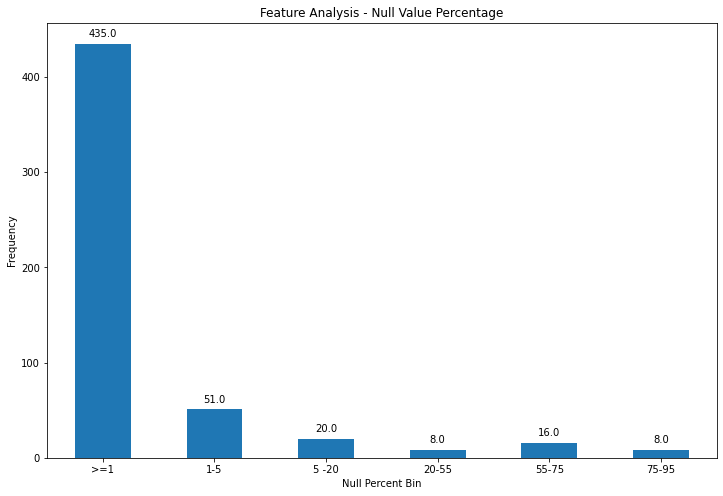

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for Null value categories 
ax = null_counts.plot(kind="bar")
ax.set_title('Feature Analysis - Null Value Percentage')
ax.set_xlabel('Null Percent Bin')
ax.set_ylabel('Frequency')
ax.set_xticklabels(labels_null,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(ax,5)
plt.show()

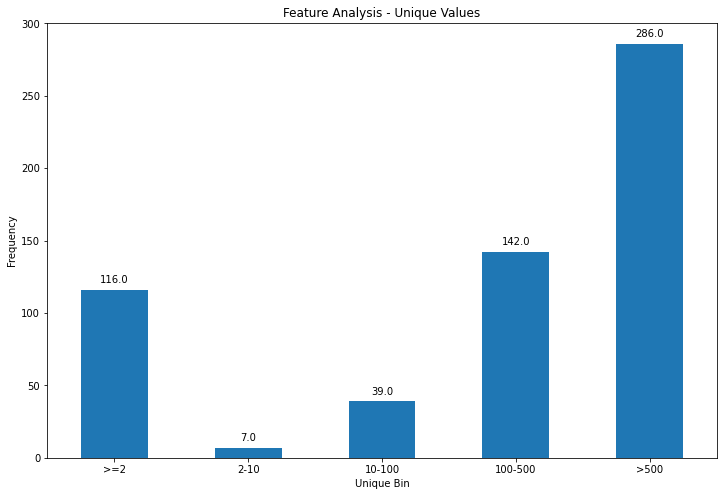

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
ux = unique_counts.plot(kind="bar")
ux.set_title('Feature Analysis - Unique Values')
ux.set_xlabel('Unique Bin')
ux.set_ylabel('Frequency')
ux.set_xticklabels(labels_unique,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(ux,5)
plt.show()

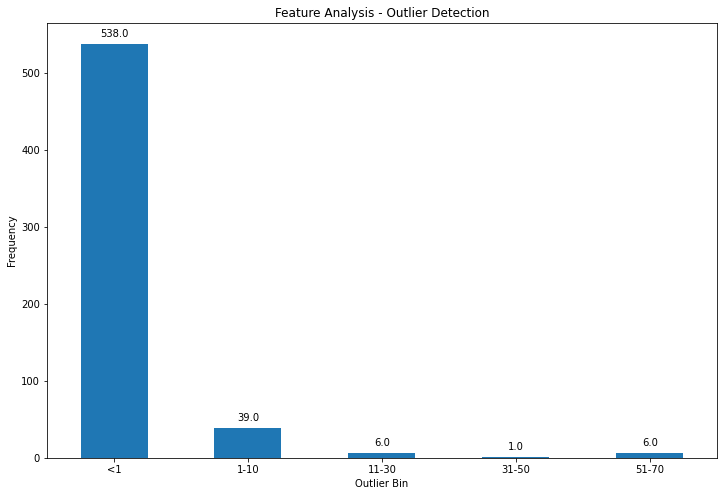

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
outx = bin3s_count.plot(kind="bar")
outx.set_title('Feature Analysis - Outlier Detection')
outx.set_xlabel('Outlier Bin')
outx.set_ylabel('Frequency')
outx.set_xticklabels(labels_3s,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(outx,5)
plt.show()

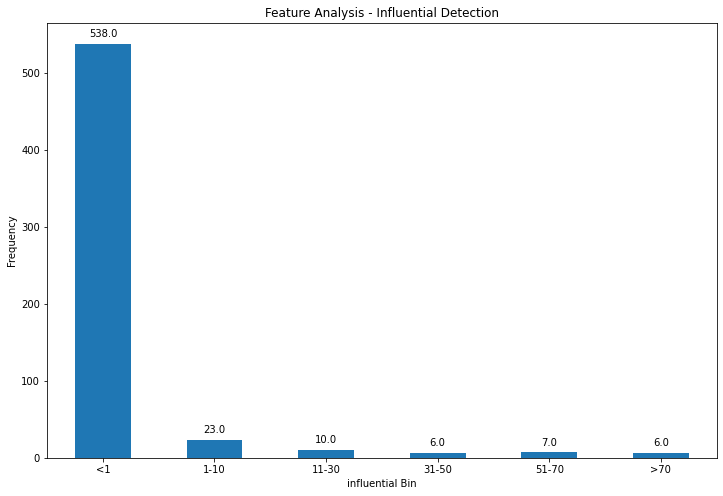

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
infx = bin2s_count.plot(kind="bar")
infx.set_title('Feature Analysis - Influential Detection')
infx.set_xlabel('influential Bin')
infx.set_ylabel('Frequency')
infx.set_xticklabels(labels_2s,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(infx,5)
plt.show()

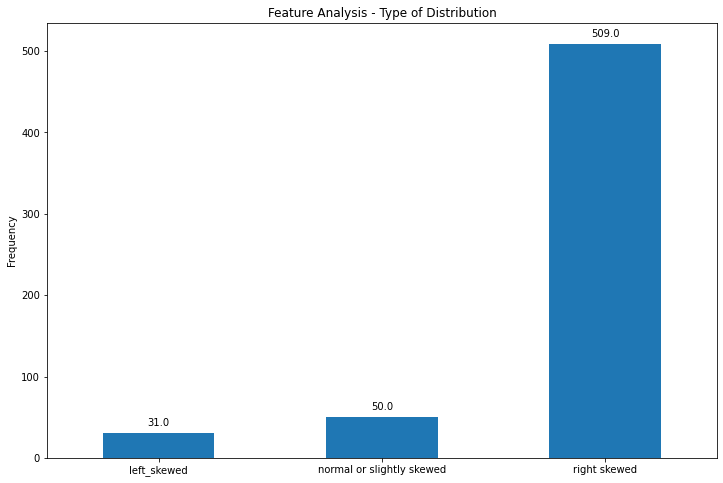

In [ ]:
plt.figure(figsize=(12, 8))
# bar Graph for Null value categories 
skx = skew_counts.plot(kind="bar")
skx.set_title('Feature Analysis - Type of Distribution')
#skx.set_xlabel('Distribution Type')
skx.set_ylabel('Frequency')
skx.set_xticklabels(labels_skew,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(skx,5)
plt.show()

In [ ]:
plt.savefig("Percent_null.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
#result1[result1['count_3s'] > 0] # 52 features with outliers
#result1[result1['unique'] < 4] # 122 , 116 features only 2 unique values
#len(result1[result1['percent_null'] > 55]) # 24 features with null values greater than 55%

Creating box plots for skewness 

In [12]:
data_secom=pd.melt(data)

In [11]:
data_secom

,variable,value
0,feature1,3030.9300
1,feature1,3095.7800
2,feature1,2932.6100
3,feature1,2988.7200
4,feature1,3032.2400
...,...,...
924525,feature590,203.1720
924526,feature590,203.1720
924527,feature590,43.5231
924528,feature590,93.4941


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


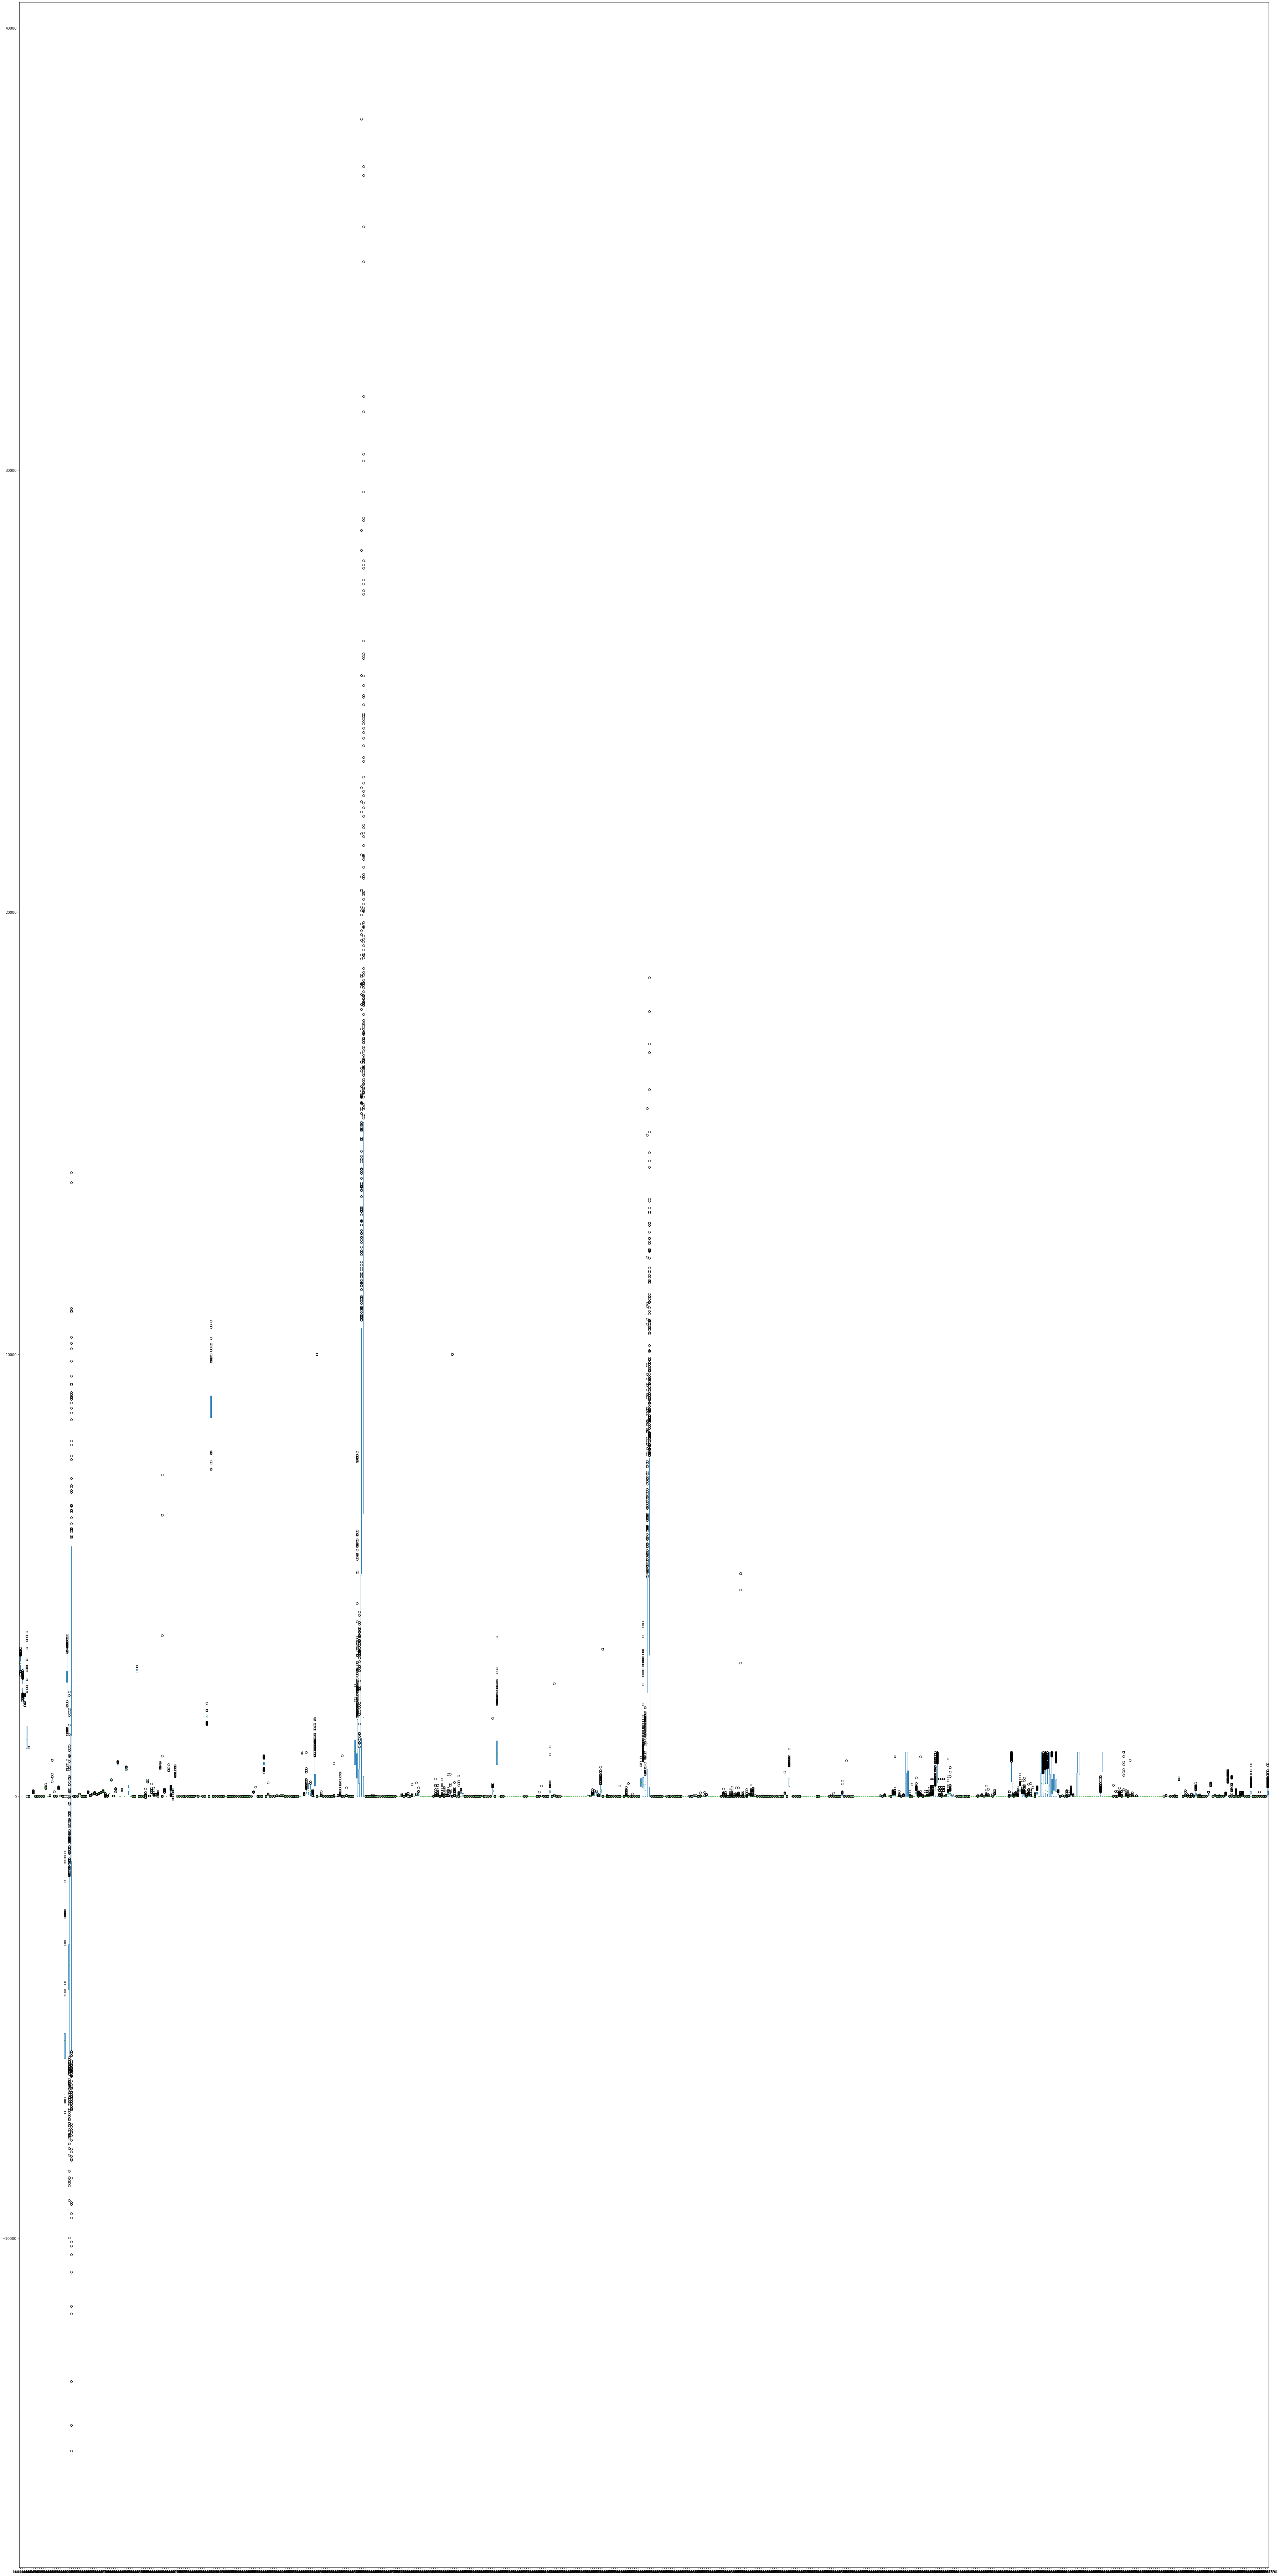

In [31]:
#adjust the size of figure 
# Set the figure size
plt.rcParams["figure.figsize"] = [50, 100.50]
plt.rcParams["figure.autolayout"] = True
#fig,box=plt.subplots()
box = data[data.columns].plot(kind='box')
#box.boxplot(data['feature1'])
plt.show()

TypeError: ignored

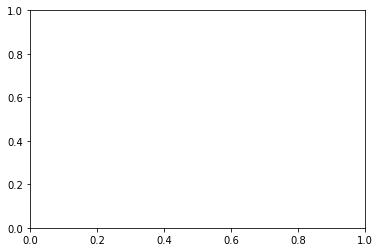

In [18]:
for columns in data.columns:
  fig, box = plt.subplots()
  box.boxplot(columns)
  plt.show()

In [ ]:
for column in data:
        plt.figure(figsize=(590,1))
        sns.boxplot(data=data, x=column)

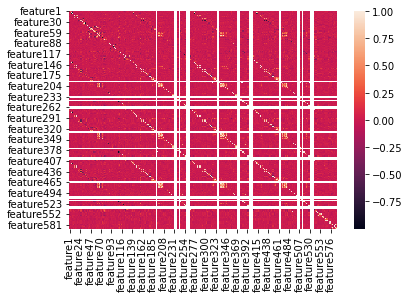

In [14]:
sns.heatmap(data.corr())